In [74]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import numpy as np
import pandas as pd

In [75]:
data=pd.read_csv('dataset_01.csv')

In [76]:
data_1=data[data['Usage']=='Training']

In [77]:
data_2=data[data['Usage']!='Training']

In [78]:
data_1.to_csv('train_data_cnn.csv', index=False)

In [79]:
data_2.to_csv('test_data_cnn.csv', index=False)

In [80]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator()



In [81]:
from tensorflow.keras.utils import to_categorical
data1 = pd.read_csv('train_data_cnn.csv')
data2 = pd.read_csv('test_data_cnn.csv')

def preprocess_data(data):
    X = np.array([np.fromstring(pixels, dtype=int, sep=' ').reshape(48, 48, 1) for pixels in data['pixels']])
    y = to_categorical(data['emotion'], num_classes=7)
    return X, y

X_train, y_train = preprocess_data(data1)
X_test, y_test = preprocess_data(data2)

X_train = X_train / 255.0
X_test = X_test / 255.0


In [82]:
train_generator = train_datagen.flow(X_train,y_train, batch_size=64)
test_generator = test_datagen.flow(X_test,y_test, batch_size=64)


In [83]:
emotion_model=Sequential()
emotion_model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
emotion_model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2,2)))
emotion_model.add(Dropout(0.25))

In [84]:
emotion_model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2,2)))
emotion_model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2,2)))
emotion_model.add(Dropout(0.25))

In [85]:
emotion_model.add(Flatten())
emotion_model.add(Dense(1024,activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7,activation='softmax'))

In [86]:
emotion_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 10, 10, 128)       0         
 ng2D)                                                

In [87]:
initial_learning_rate=0.0001
lr_schedule=ExponentialDecay(initial_learning_rate,decay_steps=100000,decay_rate=0.96)
optimizer=Adam(learning_rate=lr_schedule)
emotion_model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [88]:
emotion_model_info=emotion_model.fit_generator(
    train_generator,
    steps_per_epoch=28709//128,
    epochs=50,
    validation_data=test_generator,
    validation_steps=7178//128)


C:\Users\ishaa\AppData\Local\Temp\ipykernel_13924\4063986632.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info=emotion_model.fit_generator(


Epoch 1/50
224/224 [==============================] - 90s 376ms/step - loss: 1.8263 - accuracy: 0.2497 - val_loss: 1.8369 - val_accuracy: 0.2520
Epoch 2/50
224/224 [==============================] - 85s 377ms/step - loss: 1.8029 - accuracy: 0.2513 - val_loss: 1.7867 - val_accuracy: 0.2751
Epoch 3/50
224/224 [==============================] - 87s 387ms/step - loss: 1.7594 - accuracy: 0.2784 - val_loss: 1.7265 - val_accuracy: 0.3351
Epoch 4/50
224/224 [==============================] - 83s 370ms/step - loss: 1.7206 - accuracy: 0.3122 - val_loss: 1.6353 - val_accuracy: 0.3516
Epoch 5/50
224/224 [==============================] - 84s 377ms/step - loss: 1.6791 - accuracy: 0.3348 - val_loss: 1.5721 - val_accuracy: 0.4099
Epoch 6/50
224/224 [==============================] - 85s 380ms/step - loss: 1.6508 - accuracy: 0.3445 - val_loss: 1.5595 - val_accuracy: 0.4037
Epoch 7/50
224/224 [==============================] - 87s 389ms/step - loss: 1.6131 - accuracy: 0.3660 - val_loss: 1.4874 - val_ac

In [89]:
emotion_model.evaluate(test_generator)

107/107 [==============================] - 10s 90ms/step - loss: 1.0822 - accuracy: 0.5928


[1.082198977470398, 0.5927668213844299]

In [90]:
accuracy=emotion_model_info.history['accuracy']
val_accuracy=emotion_model_info.history['val_accuracy']
loss=emotion_model_info.history['loss']
val_loss=emotion_model_info.history['val_loss']

In [91]:
print(val_accuracy)

[0.251953125, 0.2751116156578064, 0.3351004421710968, 0.3515625, 0.4098772406578064, 0.4037388265132904, 0.4308035671710968, 0.4405691921710968, 0.4637276828289032, 0.4514508843421936, 0.4813058078289032, 0.4748883843421936, 0.4787946343421936, 0.4832589328289032, 0.5050223469734192, 0.5030692219734192, 0.5111607313156128, 0.5290178656578064, 0.5348772406578064, 0.5287388563156128, 0.5443638563156128, 0.5348772406578064, 0.5279017686843872, 0.552734375, 0.5443638563156128, 0.5401785969734192, 0.5465959906578064, 0.5552455186843872, 0.5597098469734192, 0.5563616156578064, 0.5532923936843872, 0.5599888563156128, 0.568359375, 0.556640625, 0.5611048936843872, 0.5655692219734192, 0.5652901530265808, 0.5672432780265808, 0.5797991156578064, 0.568359375, 0.5870535969734192, 0.5837053656578064, 0.5867745280265808, 0.5809151530265808, 0.5837053656578064, 0.57421875, 0.5906807780265808, 0.59375, 0.5934709906578064, 0.5906807780265808]


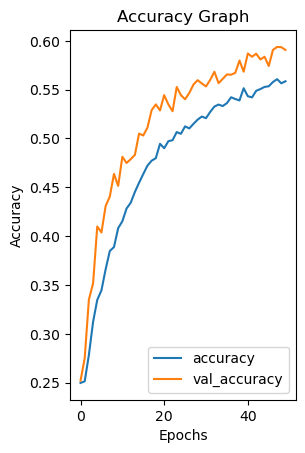

In [92]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(accuracy,label='accuracy')
plt.plot(val_accuracy,label='val_accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

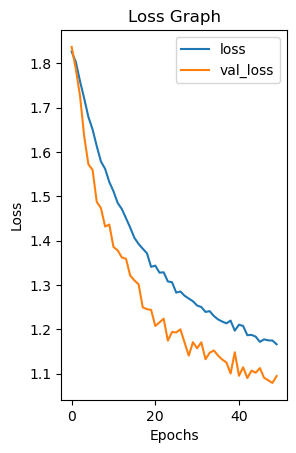

In [93]:
plt.subplot(1,2,2)
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()